# 라이브러리

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#from sklearn.tree import DecisionTreeClassifier
#from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import train_test_split

import time

# Load data
 - HN16_ALL.sas7bdat : 설문지 데이터

In [2]:
df_data = pd.read_sas("./HN16_ALL.sas7bdat", format = 'sas7bdat', encoding='iso-8859-1')
print(df_data.shape)
df_data.head()

(8150, 768)


,mod_d,ID,ID_fam,year,region,town_t,apt_t,psu,sex,age,...,N_VA_RAE,N_CAROT,N_RETIN,N_B1,N_B2,N_NIAC,N_VITC,LF_secur_y,LF_BUYER,LF_SAFE
0,2018.02.01.,A651172801,A6511728,2016.0,1.0,1.0,2.0,A651,1.0,61.0,...,68.125541,817.506495,0.000000,1.812120,1.599025,17.241284,417.773500,1.0,1.0,1.0
1,2018.02.01.,A651172802,A6511728,2016.0,1.0,1.0,2.0,A651,2.0,57.0,...,91.302698,1095.561039,0.005945,1.075103,0.756771,5.302599,31.845311,1.0,1.0,1.0
2,2018.02.01.,A651183001,A6511830,2016.0,1.0,1.0,2.0,A651,2.0,41.0,...,261.852637,2147.567940,82.888642,1.093273,0.939505,16.655787,29.051934,1.0,2.0,2.0
3,2018.02.01.,A651183002,A6511830,2016.0,1.0,1.0,2.0,A651,1.0,39.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018.02.01.,A651183003,A6511830,2016.0,1.0,1.0,2.0,A651,2.0,38.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 데이터 전처리

## 평균동맥압 파생변수 추가

In [3]:
df_data["HE_MAP"] = df_data[df_data.HE_dbp.name] + (df_data[df_data.HE_sbp.name] - df_data[df_data.HE_dbp.name]) / 3
df_data = df_data.dropna(subset=['HE_MAP'])
df_data.shape

(6833, 769)

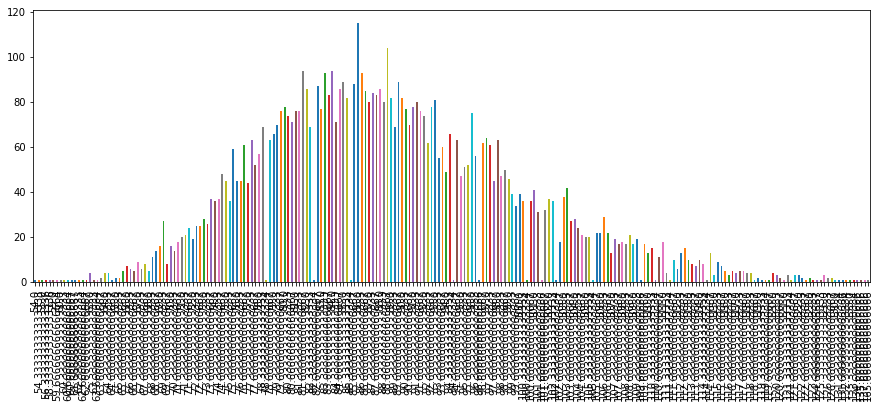

In [4]:
he_map_count = pd.value_counts(df_data.HE_MAP)
he_map_count.sort_index().plot(kind='bar', figsize=(15,5))

## 나이별 분포 확인

(1760, 769)


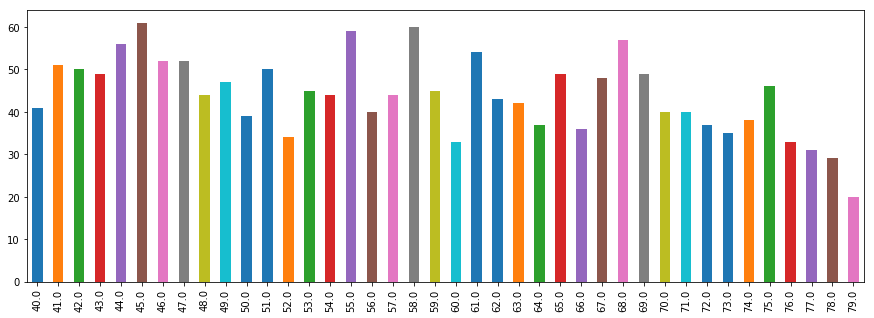

In [5]:
df_data = df_data.loc[ (40 <= df_data.age) & (df_data.age < 80) & (1 == df_data.sex) , :]
print(df_data.shape)
pd.value_counts(df_data.age).sort_index().plot(kind='bar', figsize=(15,5))

## 중요 컬럼 추출

In [6]:
df_data_cut = pd.DataFrame(df_data, columns=[
    
    # target 
    df_data.HE_MAP.name ,
    
    # 1 groups
    
    #df_data.region.name ,
    #df_data.sex.name ,
    #df_data.age.name ,
    df_data.incm.name ,
    df_data.ho_incm.name ,
    df_data.edu.name ,
    df_data.occp.name ,
    df_data.cfam.name ,
    df_data.allownc.name ,
    df_data.house.name ,
    df_data.live_t.name ,
    df_data.ainc_1.name ,
    df_data.ainc.name ,
    df_data.marri_1.name ,
    df_data.marri_2.name ,
    df_data.tins.name ,
    df_data.npins.name ,

    # 3 groups
    
    df_data.LQ4_00.name ,
    df_data.LQ4_01.name ,
    df_data.LQ4_02.name ,
    df_data.LQ4_03.name ,
    df_data.LQ4_04.name ,
    df_data.LQ4_05.name ,
    df_data.LQ4_06.name ,
    df_data.LQ4_07.name ,
    df_data.LQ4_08.name ,
    df_data.LQ4_09.name ,
    df_data.LQ4_10.name ,
    df_data.LQ4_11.name ,
    df_data.LQ4_12.name ,
    df_data.LQ4_13.name ,
    df_data.LQ4_14.name ,
    df_data.LQ4_15.name ,
    df_data.LQ4_16.name ,
    df_data.LQ4_21.name ,
    df_data.LQ4_22.name ,
    df_data.LQ4_25.name ,
    df_data.LQ4_26.name ,
    df_data.LQ4_27.name ,
    df_data.LQ4_28.name ,
    df_data.LQ4_29.name ,
    df_data.LQ4_23.name ,
    df_data.LQ1_sb.name ,
    df_data.LQ1_mn.name ,
    df_data.LQ3_sb.name ,
    df_data.LQ3_mn.name ,
    df_data.LQ2_ab.name ,
    df_data.LQ2_mn.name ,
    df_data.LQ4_ab.name ,
    df_data.LQ4_mn.name ,
    df_data.LQ_1EQL.name ,
    df_data.LQ_2EQL.name ,
    df_data.LQ_3EQL.name ,
    df_data.LQ_4EQL.name ,
    df_data.LQ_5EQL.name ,
    df_data.AC1_yr.name ,
    df_data.AC3.name ,

    # 4 groups
    
    df_data.educ.name ,
    df_data.graduat.name ,
    df_data.EC1_1.name ,
    df_data.EC1_2.name ,
    df_data.EC_occp.name ,
    df_data.EC_stt_1.name ,
    df_data.EC_stt_2.name ,
    df_data.EC_wh.name ,
    df_data.EC_wht_0.name ,
    df_data.EC_wht_23.name ,
    df_data.EC_wht_5.name ,
    df_data.EC_lgw_2.name ,
    df_data.EC_lgw_4.name ,
    df_data.EC_lgw_5.name ,
    df_data.EC_pedu_1.name ,
    df_data.EC_pedu_2.name ,

    # 5 groups

    df_data.BO1.name ,
    df_data.BO1_1.name ,
    df_data.BO1_2.name ,
    df_data.BO1_3.name ,
    df_data.BO2_1.name ,
    df_data.BO3_01.name ,
    df_data.BO3_02.name ,
    df_data.BO3_03.name ,
    df_data.BO3_14.name ,
    df_data.BO3_05.name ,
    df_data.BO3_04.name ,
    df_data.BO3_12.name ,
    df_data.BO3_07.name ,
    df_data.BO3_09.name ,
    df_data.BO3_10.name ,

    # 6 groups

    df_data.BD1.name ,
    df_data.BD2.name ,
    df_data.BD1_11.name ,
    df_data.BD2_1.name ,
    df_data.BD2_31.name ,
    df_data.BD2_32.name ,
    df_data.BD7_4.name ,
    df_data.BD7_5.name ,
    df_data.BD7_6.name ,
    df_data.dr_month.name ,

    # 7 groups

    df_data.Total_slp_wk.name ,
    df_data.Total_slp_wd.name ,
    #df_data.BP_PHQ_1.name ,
    #df_data.BP_PHQ_2.name ,
    #df_data.BP_PHQ_3.name ,
    #df_data.BP_PHQ_4.name ,
    #df_data.BP_PHQ_5.name ,
    #df_data.BP_PHQ_6.name ,
    #df_data.BP_PHQ_7.name ,
    #df_data.BP_PHQ_8.name ,
    #df_data.BP_PHQ_9.name ,
    df_data.mh_PHQ_S.name ,
    df_data.BP1.name ,
    df_data.BP5.name ,
    df_data.BP6_10.name ,
    df_data.BP6_2.name ,
    df_data.BP6_31.name ,
    df_data.BP7.name ,
    df_data.mh_stress.name ,

    # 8 groups

    df_data.BS1_1.name ,
    df_data.BS2_1.name ,
    df_data.BS3_1.name ,
    df_data.BS3_2.name ,
    df_data.BS3_3.name ,
    df_data.BS6_2.name ,
    df_data.BS6_2_1.name ,
    df_data.BS6_2_2.name ,
    df_data.BS6_3.name ,
    df_data.BS6_4.name ,
    df_data.BS6_4_1.name ,
    df_data.BS6_4_2.name ,
    df_data.BS5_4.name ,
    df_data.BS5.name ,
    df_data.BS5_1.name ,
    df_data.BS5_5.name ,
    df_data.BS5_21.name ,
    df_data.BS5_28.name ,
    df_data.BS5_26.name ,
    df_data.BS5_33.name ,
    df_data.BS5_34.name ,
    df_data.BS5_32.name ,
    df_data.BS5_29.name ,
    df_data.BS5_30.name ,
    df_data.BS8_2.name ,
    df_data.BS9_2.name ,
    df_data.BS13.name ,
    df_data.BS12_1.name ,
    df_data.BS12_2.name ,
    df_data.BS12_21.name ,
    df_data.BS12_31.name ,
    df_data.BS12_32.name ,
    df_data.BS12_33.name ,
    df_data.BS12_34.name ,
    df_data.BS12_36.name ,
    df_data.BS12_41.name ,
    df_data.BS12_42.name ,
    df_data.BS12_43.name ,
    df_data.BS12_44.name ,
    df_data.BS12_46.name ,

    # 9 groups

    df_data.BE3_71.name ,
    df_data.BE3_72.name ,
    df_data.BE3_73.name ,
    df_data.BE3_74.name ,
    df_data.BE3_81.name ,
    df_data.BE3_82.name ,
    df_data.BE3_83.name ,
    df_data.BE3_84.name ,
    df_data.BE3_91.name ,
    df_data.BE3_92.name ,
    df_data.BE3_93.name ,
    df_data.BE3_94.name ,
    df_data.BE3_75.name ,
    df_data.BE3_76.name ,
    df_data.BE3_77.name ,
    df_data.BE3_78.name ,
    df_data.BE3_85.name ,
    df_data.BE3_86.name ,
    df_data.BE3_87.name ,
    df_data.BE3_88.name ,
    df_data.BE8_1.name ,
    df_data.BE8_2.name ,
    df_data.BE3_31.name ,
    df_data.BE3_32.name ,
    df_data.BE3_33.name ,
    df_data.BE5_1.name ,
    df_data.pa_aerobic.name ,

    # 10 groups

    df_data.LW_ms.name ,
    df_data.LW_mp_a.name ,
    df_data.LW_ms_a.name ,
    df_data.LW_pr.name ,
    df_data.LW_pr_1.name ,
    df_data.LW_mt.name ,
    df_data.LW_mt_a1.name ,
    df_data.LW_mt_a2.name ,
    df_data.LW_br.name ,
    df_data.LW_br_ch.name ,
    df_data.LW_br_dur.name ,
    df_data.LW_oc.name ,

    # 11 groups

    df_data.HE_DMdg.name ,
    df_data.HE_DMdr.name ,
    df_data.HE_mens.name ,
    df_data.HE_prg.name ,
    #df_data.HE_dprg.name ,
    df_data.HE_fh.name ,
    df_data.HE_HPfh1.name ,
    df_data.HE_HPfh2.name ,
    df_data.HE_HPfh3.name ,
    df_data.HE_HLfh1.name ,
    df_data.HE_HLfh2.name ,
    df_data.HE_HLfh3.name ,
    df_data.HE_IHDfh1.name ,
    df_data.HE_IHDfh2.name ,
    df_data.HE_IHDfh3.name ,
    df_data.HE_STRfh1.name ,
    df_data.HE_STRfh2.name ,
    df_data.HE_STRfh3.name ,
    df_data.HE_DMfh1.name ,
    df_data.HE_DMfh2.name ,
    df_data.HE_DMfh3.name ,
    df_data.HE_THfh1.name ,
    df_data.HE_THfh2.name ,
    df_data.HE_THfh3.name ,
    df_data.HE_HBfh1.name ,
    df_data.HE_HBfh2.name ,
    df_data.HE_HBfh3.name ,
    df_data.HE_rPLS.name ,
    df_data.HE_PLS.name ,
    df_data.HE_mPLS.name ,
    df_data.HE_nARM.name ,
    df_data.HE_ht.name ,
    df_data.HE_wt.name ,
    df_data.HE_wc.name ,
    df_data.HE_BMI.name ,
    df_data.HE_obe.name ,
    df_data.HE_glu.name ,
    df_data.HE_HbA1c.name ,
    df_data.HE_DM.name ,
    df_data.HE_chol.name ,
    df_data.HE_HDL_st2.name ,
    df_data.HE_TG.name ,
    df_data.HE_LDL_drct.name ,
    df_data.HE_HCHOL.name ,
    df_data.HE_HTG.name ,
    df_data.HE_HBsAg.name ,
    df_data.HE_ast.name ,
    df_data.HE_alt.name ,
    df_data.HE_hepaB.name ,
    df_data.HE_hcv.name ,
    df_data.HE_hepaC.name ,
    df_data.HE_HB.name ,
    df_data.HE_HCT.name ,
    df_data.HE_anem.name ,
    df_data.HE_BUN.name ,
    df_data.HE_crea.name ,
    df_data.HE_WBC.name ,
    df_data.HE_RBC.name ,
    df_data.HE_Bplt.name ,
    df_data.HE_hsCRP.name ,
    df_data.HE_Uacid.name ,
    df_data.HE_Pb.name ,
    df_data.HE_Hg.name ,
    df_data.HE_Cd.name ,
    df_data.HE_Uph.name ,
    df_data.HE_Unitr.name ,
    df_data.HE_Usg.name ,
    df_data.HE_Upro.name ,
    df_data.HE_Uglu.name ,
    df_data.HE_Uket.name ,
    df_data.HE_Ubil.name ,
    df_data.HE_Ubld.name ,
    df_data.HE_Uro.name ,
    df_data.HE_Ucot.name ,
    df_data.HE_UCREA.name ,
    df_data.HE_UNa.name ,
    df_data.HE_Ukal.name ,
    df_data.HE_fvc.name ,
    df_data.HE_fvcp.name ,
    df_data.HE_fev1.name ,
    df_data.HE_fev1p.name ,
    df_data.HE_fev1fvc.name ,
    df_data.HE_fev6.name ,
    df_data.HE_fef25_75.name ,
    df_data.HE_pef.name ,
    df_data.HE_COPD.name ,
    df_data.HE_cough1.name ,
    df_data.HE_cough2.name ,
    df_data.HE_sput1.name ,
    df_data.HE_sput2.name ,
    df_data.HE_PFTdr.name ,
    df_data.HE_PFTag.name ,
    df_data.HE_PFTtr.name ,
    df_data.HE_PFThs.name ,
    df_data.T_Q_HR.name ,
    df_data.T_Q_HR1.name ,
    df_data.T_Q_VN.name ,
    df_data.T_Q_VN1.name ,
    df_data.T_NQ_PH.name ,
    df_data.T_NQ_PH_T.name ,
    df_data.T_NQ_OCP.name ,
    df_data.T_NQ_OCP_T.name ,
    df_data.T_NQ_OCP_P.name ,
    df_data.T_NQ_LS.name ,
    df_data.T_NQ_LS_T.name ,
    df_data.T_NQ_FIR.name ,
    df_data.T_NQ_FIR_P.name ,
    df_data.L_BR_FQ.name ,
    df_data.L_LN_FQ.name ,
    df_data.L_DN_FQ.name ,
    df_data.LK_EDU.name ,
    df_data.LK_LB_CO.name ,
    df_data.LK_LB_US.name ,
    df_data.LK_LB_IT.name ,
    df_data.LK_LB_EF.name ,
    df_data.N_DIET.name ,
    df_data.N_DIET_WHY.name ,
    df_data.N_WAT_C.name ,
    df_data.N_PRG.name ,
    df_data.N_INTK.name ,
    df_data.N_EN.name ,
    df_data.N_WATER.name ,
    df_data.N_PROT.name ,
    df_data.N_FAT.name ,
    df_data.N_SFA.name ,
    df_data.N_MUFA.name ,
    df_data.N_PUFA.name ,
    df_data.N_N3.name ,
    df_data.N_N6.name ,
    df_data.N_CHOL.name ,
    df_data.N_CHO.name ,
    df_data.N_TDF.name ,
    df_data.N_CA.name ,
    df_data.N_PHOS.name ,
    df_data.N_FE.name ,
    df_data.N_NA.name ,
    df_data.N_K.name ,
    df_data.N_VA.name ,
    df_data.N_VA_RAE.name ,
    df_data.N_CAROT.name ,
    df_data.N_RETIN.name ,
    df_data.N_B1.name ,
    df_data.N_B2.name ,
    df_data.N_NIAC.name ,
    df_data.N_VITC.name ,
    #df_data.LF_secur_y.name ,
    #df_data.LF_BUYER.name ,
    df_data.LF_SAFE.name
])
total_column_count = df_data_cut.columns.size
print(total_column_count)
print(df_data_cut.shape)
df_data_cut.head()

330
(1760, 330)


,HE_MAP,incm,ho_incm,edu,occp,cfam,allownc,house,live_t,ainc_1,...,N_K,N_VA,N_VA_RAE,N_CAROT,N_RETIN,N_B1,N_B2,N_NIAC,N_VITC,LF_SAFE
0,98.000000,3.0,3.0,4.0,7.0,3.0,20.0,2.0,2.0,500.0,...,4597.524532,138.638485,68.125541,817.506495,0.000000,1.812120,1.599025,17.241284,417.773500,1.0
13,91.333333,4.0,4.0,4.0,2.0,4.0,20.0,1.0,2.0,1000.0,...,3870.722905,1941.330100,1358.152111,6959.526200,778.191594,3.078527,2.638125,21.189960,388.132316,1.0
14,91.666667,3.0,4.0,4.0,1.0,3.0,20.0,3.0,2.0,7000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18,104.666667,4.0,4.0,4.0,2.0,4.0,20.0,3.0,2.0,750.0,...,2056.983578,597.754458,392.246740,2401.220159,192.145060,2.160682,1.736965,14.356613,25.878406,2.0
22,100.000000,3.0,4.0,4.0,3.0,3.0,20.0,1.0,2.0,550.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 모든 값이 NaN인 경우 삭제

In [7]:
df_data_cut.dropna(how='all', inplace=True)
df_data_cut.reindex()
print(df_data_cut.shape)
df_data_cut.head()

(1760, 330)


,HE_MAP,incm,ho_incm,edu,occp,cfam,allownc,house,live_t,ainc_1,...,N_K,N_VA,N_VA_RAE,N_CAROT,N_RETIN,N_B1,N_B2,N_NIAC,N_VITC,LF_SAFE
0,98.000000,3.0,3.0,4.0,7.0,3.0,20.0,2.0,2.0,500.0,...,4597.524532,138.638485,68.125541,817.506495,0.000000,1.812120,1.599025,17.241284,417.773500,1.0
13,91.333333,4.0,4.0,4.0,2.0,4.0,20.0,1.0,2.0,1000.0,...,3870.722905,1941.330100,1358.152111,6959.526200,778.191594,3.078527,2.638125,21.189960,388.132316,1.0
14,91.666667,3.0,4.0,4.0,1.0,3.0,20.0,3.0,2.0,7000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18,104.666667,4.0,4.0,4.0,2.0,4.0,20.0,3.0,2.0,750.0,...,2056.983578,597.754458,392.246740,2401.220159,192.145060,2.160682,1.736965,14.356613,25.878406,2.0
22,100.000000,3.0,4.0,4.0,3.0,3.0,20.0,1.0,2.0,550.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 특정 value 값을 NaN 처리

In [8]:
def setNanValues(in_df, name, nan_values) :
    
    start_na_count = in_df[name].isna().sum()
    
    uniq_values = sorted(map(float,in_df[name].dropna().unique()))
    
    in_df[name] = in_df[name].map(lambda x: np.nan if x in nan_values else x)
        
    #print(sorted(map(float,in_df[name].dropna().unique())))
        
    end_na_count = in_df[name].isna().sum()
    
    print("%s NaN count %s -> %s" % (name,start_na_count,end_na_count))
    
    return in_df

nan_df_data = df_data_cut.copy(deep=True)

nan_df_data = setNanValues(nan_df_data, nan_df_data.marri_2.name, [88.0, 99.0])
nan_df_data = setNanValues(nan_df_data, nan_df_data.EC_pedu_1.name, [88.0, 99.0])
nan_df_data = setNanValues(nan_df_data, nan_df_data.EC_pedu_2.name, [88.0, 99.0])

nan_df_data = setNanValues(nan_df_data, nan_df_data.LQ4_00.name, [9.0])
nan_df_data = setNanValues(nan_df_data, nan_df_data.LQ4_01.name, [8.0, 9.0])
nan_df_data = setNanValues(nan_df_data, nan_df_data.LQ4_02.name, [8.0, 9.0])
nan_df_data = setNanValues(nan_df_data, nan_df_data.LQ4_03.name, [8.0, 9.0])
nan_df_data = setNanValues(nan_df_data, nan_df_data.LQ4_04.name, [8.0, 9.0])

nan_df_data = setNanValues(nan_df_data, nan_df_data.LQ4_05.name, [8.0, 9.0])
nan_df_data = setNanValues(nan_df_data, nan_df_data.LQ4_06.name, [8.0, 9.0])
nan_df_data = setNanValues(nan_df_data, nan_df_data.LQ4_07.name, [8.0, 9.0])
nan_df_data = setNanValues(nan_df_data, nan_df_data.LQ4_08.name, [8.0, 9.0])
nan_df_data = setNanValues(nan_df_data, nan_df_data.LQ4_09.name, [8.0, 9.0])

nan_df_data = setNanValues(nan_df_data, nan_df_data.LQ4_10.name, [8.0, 9.0])
nan_df_data = setNanValues(nan_df_data, nan_df_data.LQ4_11.name, [8.0, 9.0])
nan_df_data = setNanValues(nan_df_data, nan_df_data.LQ4_12.name, [8.0, 9.0])
nan_df_data = setNanValues(nan_df_data, nan_df_data.LQ4_13.name, [8.0, 9.0])
nan_df_data = setNanValues(nan_df_data, nan_df_data.LQ4_14.name, [8.0, 9.0])

nan_df_data = setNanValues(nan_df_data, nan_df_data.LQ4_15.name, [8.0, 9.0])
nan_df_data = setNanValues(nan_df_data, nan_df_data.LQ4_16.name, [8.0, 9.0])
nan_df_data = setNanValues(nan_df_data, nan_df_data.LQ4_21.name, [8.0, 9.0])
nan_df_data = setNanValues(nan_df_data, nan_df_data.LQ4_22.name, [8.0, 9.0])
nan_df_data = setNanValues(nan_df_data, nan_df_data.LQ4_25.name, [8.0, 9.0])

nan_df_data = setNanValues(nan_df_data, nan_df_data.LQ4_26.name, [8.0, 9.0])
nan_df_data = setNanValues(nan_df_data, nan_df_data.LQ4_27.name, [8.0, 9.0])
nan_df_data = setNanValues(nan_df_data, nan_df_data.LQ4_28.name, [8.0, 9.0])
nan_df_data = setNanValues(nan_df_data, nan_df_data.LQ4_29.name, [8.0, 9.0])
nan_df_data = setNanValues(nan_df_data, nan_df_data.LQ4_23.name, [8.0, 9.0])

nan_df_data = setNanValues(nan_df_data, nan_df_data.LQ1_sb.name, [9.0])
nan_df_data = setNanValues(nan_df_data, nan_df_data.LQ1_mn.name, [88.0, 99.0])
nan_df_data = setNanValues(nan_df_data, nan_df_data.LQ3_sb.name, [9.0])
nan_df_data = setNanValues(nan_df_data, nan_df_data.LQ3_mn.name, [888.0, 999.0])
nan_df_data = setNanValues(nan_df_data, nan_df_data.LQ2_ab.name, [88.0, 99.0])
nan_df_data = setNanValues(nan_df_data, nan_df_data.LQ2_mn.name, [88.0, 99.0])
nan_df_data = setNanValues(nan_df_data, nan_df_data.LQ4_ab.name, [8.0, 9.0])
nan_df_data = setNanValues(nan_df_data, nan_df_data.LQ4_mn.name, [888.0, 999.0])

nan_df_data = setNanValues(nan_df_data, nan_df_data.LQ_1EQL.name, [8.0, 9.0])
nan_df_data = setNanValues(nan_df_data, nan_df_data.LQ_2EQL.name, [9.0])
nan_df_data = setNanValues(nan_df_data, nan_df_data.LQ_3EQL.name, [9.0])
nan_df_data = setNanValues(nan_df_data, nan_df_data.LQ_4EQL.name, [9.0])
nan_df_data = setNanValues(nan_df_data, nan_df_data.LQ_5EQL.name, [9.0])

nan_df_data = setNanValues(nan_df_data, nan_df_data.AC1_yr.name, [9.0])
nan_df_data = setNanValues(nan_df_data, nan_df_data.AC3.name, [88.0, 99.0])
nan_df_data = setNanValues(nan_df_data, nan_df_data.educ.name, [99.0])
nan_df_data = setNanValues(nan_df_data, nan_df_data.graduat.name, [8.0, 9.0])
nan_df_data = setNanValues(nan_df_data, nan_df_data.EC1_1.name, [9.0])
nan_df_data = setNanValues(nan_df_data, nan_df_data.EC1_2.name, [7.0, 8.0, 9.0])
nan_df_data = setNanValues(nan_df_data, nan_df_data.EC_occp.name, [88.0, 99.0])

nan_df_data = setNanValues(nan_df_data, nan_df_data.EC_stt_1.name, [8.0, 9.0])
nan_df_data = setNanValues(nan_df_data, nan_df_data.EC_stt_2.name, [8.0, 9.0])
nan_df_data = setNanValues(nan_df_data, nan_df_data.EC_wh.name, [8.0, 9.0])
nan_df_data = setNanValues(nan_df_data, nan_df_data.EC_wht_0.name, [8.0, 9.0])
nan_df_data = setNanValues(nan_df_data, nan_df_data.EC_wht_23.name, [888.0, 999.0])
nan_df_data = setNanValues(nan_df_data, nan_df_data.EC_wht_5.name, [88.0, 99.0])
nan_df_data = setNanValues(nan_df_data, nan_df_data.EC_lgw_2.name, [88.0, 99.0])

nan_df_data = setNanValues(nan_df_data, nan_df_data.EC_lgw_4.name, [8.0, 9.0])
nan_df_data = setNanValues(nan_df_data, nan_df_data.EC_lgw_5.name, [8.0, 9.0])
nan_df_data = setNanValues(nan_df_data, nan_df_data.BO1.name, [8.0, 9.0])
nan_df_data = setNanValues(nan_df_data, nan_df_data.BO1_1.name, [8.0, 9.0])
nan_df_data = setNanValues(nan_df_data, nan_df_data.BO1_2.name, [8.0, 9.0])

nan_df_data = setNanValues(nan_df_data, nan_df_data.BO1_3.name, [8.0, 9.0])
nan_df_data = setNanValues(nan_df_data, nan_df_data.BO2_1.name, [8.0, 9.0])
nan_df_data = setNanValues(nan_df_data, nan_df_data.BO3_01.name, [8.0, 9.0])
nan_df_data = setNanValues(nan_df_data, nan_df_data.BO3_02.name, [8.0, 9.0])
nan_df_data = setNanValues(nan_df_data, nan_df_data.BO3_03.name, [8.0, 9.0])

nan_df_data = setNanValues(nan_df_data, nan_df_data.BO3_14.name, [8.0, 9.0])
nan_df_data = setNanValues(nan_df_data, nan_df_data.BO3_05.name, [8.0, 9.0])
nan_df_data = setNanValues(nan_df_data, nan_df_data.BO3_04.name, [8.0, 9.0])
nan_df_data = setNanValues(nan_df_data, nan_df_data.BO3_12.name, [8.0, 9.0])
nan_df_data = setNanValues(nan_df_data, nan_df_data.BO3_07.name, [8.0, 9.0])

#nan_df_data = setNanValues(nan_df_data, nan_df_data.incm.name, [8.0, 9.0])
#nan_df_data = setNanValues(nan_df_data, nan_df_data.ho_incm.name, [8.0, 9.0])
nan_df_data = setNanValues(nan_df_data, nan_df_data.edu.name, [888.0, 999.0])
nan_df_data = setNanValues(nan_df_data, nan_df_data.BO3_09.name, [8.0, 9.0])
nan_df_data = setNanValues(nan_df_data, nan_df_data.BO3_10.name, [8.0, 9.0])
nan_df_data = setNanValues(nan_df_data, nan_df_data.BD1.name, [8.0, 9.0])
nan_df_data = setNanValues(nan_df_data, nan_df_data.BD2.name, [888.0, 999.0])
nan_df_data = setNanValues(nan_df_data, nan_df_data.BD1_11.name, [8.0, 9.0])
nan_df_data = setNanValues(nan_df_data, nan_df_data.BD2_1.name, [8.0, 9.0])
nan_df_data = setNanValues(nan_df_data, nan_df_data.BD2_31.name, [8.0, 9.0])
nan_df_data = setNanValues(nan_df_data, nan_df_data.BD2_32.name, [8.0, 9.0])
nan_df_data = setNanValues(nan_df_data, nan_df_data.BD7_4.name, [8.0, 9.0])
nan_df_data = setNanValues(nan_df_data, nan_df_data.BD7_5.name, [8.0, 9.0])
nan_df_data = setNanValues(nan_df_data, nan_df_data.BD7_6.name, [8.0, 9.0])
nan_df_data = setNanValues(nan_df_data, nan_df_data.Total_slp_wk.name, [8888.0, 9999.0])
nan_df_data = setNanValues(nan_df_data, nan_df_data.Total_slp_wd.name, [8888.0, 9999.0])
nan_df_data = setNanValues(nan_df_data, nan_df_data.BP1.name, [8.0, 9.0])
nan_df_data = setNanValues(nan_df_data, nan_df_data.BP5.name, [8.0, 9.0])
nan_df_data = setNanValues(nan_df_data, nan_df_data.BP6_10.name, [8.0, 9.0])
nan_df_data = setNanValues(nan_df_data, nan_df_data.BP6_2.name, [8.0, 9.0])
nan_df_data = setNanValues(nan_df_data, nan_df_data.BP6_31.name, [8.0, 9.0])
nan_df_data = setNanValues(nan_df_data, nan_df_data.BP7.name, [8.0, 9.0])
nan_df_data = setNanValues(nan_df_data, nan_df_data.BS1_1.name, [8.0, 9.0])
nan_df_data = setNanValues(nan_df_data, nan_df_data.BS2_1.name, [888.0, 999.0])
nan_df_data = setNanValues(nan_df_data, nan_df_data.BS3_1.name, [8.0, 9.0])
nan_df_data = setNanValues(nan_df_data, nan_df_data.BS3_2.name, [888.0, 999.0])
nan_df_data = setNanValues(nan_df_data, nan_df_data.BS3_3.name, [88.0, 99.0])
nan_df_data = setNanValues(nan_df_data, nan_df_data.BS6_2.name, [8888.0, 9999.0])
nan_df_data = setNanValues(nan_df_data, nan_df_data.BS6_2_1.name, [88.0, 99.0])
nan_df_data = setNanValues(nan_df_data, nan_df_data.BS6_2_2.name, [88.0, 99.0])
nan_df_data = setNanValues(nan_df_data, nan_df_data.BS6_3.name, [888.0, 999.0])
nan_df_data = setNanValues(nan_df_data, nan_df_data.BS6_4.name, [8888.0, 9999.0])
nan_df_data = setNanValues(nan_df_data, nan_df_data.BS6_4_1.name, [88.0, 99.0])
nan_df_data = setNanValues(nan_df_data, nan_df_data.BS6_4_2.name, [88.0, 99.0])
nan_df_data = setNanValues(nan_df_data, nan_df_data.BS5_4.name, [8.0, 9.0])
nan_df_data = setNanValues(nan_df_data, nan_df_data.BS5.name, [8.0, 9.0])
nan_df_data = setNanValues(nan_df_data, nan_df_data.BS5_1.name, [8.0, 9.0])
nan_df_data = setNanValues(nan_df_data, nan_df_data.BS5_5.name, [8.0, 9.0])
nan_df_data = setNanValues(nan_df_data, nan_df_data.BS5_21.name, [8.0, 9.0])
nan_df_data = setNanValues(nan_df_data, nan_df_data.BS5_28.name, [8.0, 9.0])
nan_df_data = setNanValues(nan_df_data, nan_df_data.BS5_26.name, [8.0, 9.0])
nan_df_data = setNanValues(nan_df_data, nan_df_data.BS5_33.name, [8.0, 9.0])
nan_df_data = setNanValues(nan_df_data, nan_df_data.BS5_34.name, [8.0, 9.0])
nan_df_data = setNanValues(nan_df_data, nan_df_data.BS5_32.name, [8.0, 9.0])
nan_df_data = setNanValues(nan_df_data, nan_df_data.BS5_29.name, [8.0, 9.0])
nan_df_data = setNanValues(nan_df_data, nan_df_data.BS5_30.name, [8.0, 9.0])
nan_df_data = setNanValues(nan_df_data, nan_df_data.BS8_2.name, [8.0, 9.0])
nan_df_data = setNanValues(nan_df_data, nan_df_data.BS9_2.name, [8.0, 9.0])
nan_df_data = setNanValues(nan_df_data, nan_df_data.BS13.name, [8.0, 9.0])
nan_df_data = setNanValues(nan_df_data, nan_df_data.BS12_1.name, [8.0, 9.0])
nan_df_data = setNanValues(nan_df_data, nan_df_data.BS12_2.name, [8.0, 9.0])
nan_df_data = setNanValues(nan_df_data, nan_df_data.BS12_21.name, [88.0, 99.0])
nan_df_data = setNanValues(nan_df_data, nan_df_data.BS12_31.name, [8.0, 9.0])
nan_df_data = setNanValues(nan_df_data, nan_df_data.BS12_32.name, [8.0, 9.0])
nan_df_data = setNanValues(nan_df_data, nan_df_data.BS12_33.name, [8.0, 9.0])
nan_df_data = setNanValues(nan_df_data, nan_df_data.BS12_34.name, [8.0, 9.0])
nan_df_data = setNanValues(nan_df_data, nan_df_data.BS12_36.name, [8.0, 9.0])
nan_df_data = setNanValues(nan_df_data, nan_df_data.BS12_41.name, [8.0, 9.0])
nan_df_data = setNanValues(nan_df_data, nan_df_data.BS12_42.name, [8.0, 9.0])
nan_df_data = setNanValues(nan_df_data, nan_df_data.BS12_43.name, [8.0, 9.0])
nan_df_data = setNanValues(nan_df_data, nan_df_data.BS12_44.name, [8.0, 9.0])
nan_df_data = setNanValues(nan_df_data, nan_df_data.BS12_46.name, [8.0, 9.0])
nan_df_data = setNanValues(nan_df_data, nan_df_data.BE3_71.name, [8.0, 9.0])
nan_df_data = setNanValues(nan_df_data, nan_df_data.BE3_72.name, [8.0, 9.0])
nan_df_data = setNanValues(nan_df_data, nan_df_data.BE3_73.name, [88.0, 99.0])
nan_df_data = setNanValues(nan_df_data, nan_df_data.BE3_74.name, [88.0, 99.0])
nan_df_data = setNanValues(nan_df_data, nan_df_data.BE3_81.name, [8.0, 9.0])
nan_df_data = setNanValues(nan_df_data, nan_df_data.BE3_82.name, [8.0, 9.0])
nan_df_data = setNanValues(nan_df_data, nan_df_data.BE3_83.name, [88.0, 99.0])
nan_df_data = setNanValues(nan_df_data, nan_df_data.BE3_84.name, [88.0, 99.0])
nan_df_data = setNanValues(nan_df_data, nan_df_data.BE3_91.name, [8.0, 9.0])
nan_df_data = setNanValues(nan_df_data, nan_df_data.BE3_92.name, [8.0, 9.0])
nan_df_data = setNanValues(nan_df_data, nan_df_data.BE3_93.name, [88.0, 99.0])
nan_df_data = setNanValues(nan_df_data, nan_df_data.BE3_94.name, [88.0, 99.0])
nan_df_data = setNanValues(nan_df_data, nan_df_data.BE3_75.name, [8.0, 9.0])
nan_df_data = setNanValues(nan_df_data, nan_df_data.BE3_76.name, [8.0, 9.0])
nan_df_data = setNanValues(nan_df_data, nan_df_data.BE3_77.name, [88.0, 99.0])
nan_df_data = setNanValues(nan_df_data, nan_df_data.BE3_78.name, [88.0, 99.0])
nan_df_data = setNanValues(nan_df_data, nan_df_data.BE3_85.name, [8.0, 9.0])
nan_df_data = setNanValues(nan_df_data, nan_df_data.BE3_86.name, [8.0, 9.0])
nan_df_data = setNanValues(nan_df_data, nan_df_data.BE3_87.name, [88.0, 99.0])
nan_df_data = setNanValues(nan_df_data, nan_df_data.BE3_88.name, [88.0, 99.0])
nan_df_data = setNanValues(nan_df_data, nan_df_data.BE8_1.name, [88.0, 99.0])
nan_df_data = setNanValues(nan_df_data, nan_df_data.BE8_2.name, [88.0, 99.0])
nan_df_data = setNanValues(nan_df_data, nan_df_data.BE3_31.name, [88.0, 99.0])
nan_df_data = setNanValues(nan_df_data, nan_df_data.BE3_32.name, [88.0, 99.0])
nan_df_data = setNanValues(nan_df_data, nan_df_data.BE3_33.name, [88.0, 99.0])
nan_df_data = setNanValues(nan_df_data, nan_df_data.BE5_1.name, [8.0, 9.0])
nan_df_data = setNanValues(nan_df_data, nan_df_data.LW_ms.name, [8.0, 9.0])
nan_df_data = setNanValues(nan_df_data, nan_df_data.LW_mp_a.name, [888.0, 999.0])
nan_df_data = setNanValues(nan_df_data, nan_df_data.LW_ms_a.name, [888.0, 999.0])
nan_df_data = setNanValues(nan_df_data, nan_df_data.LW_pr.name, [8.0, 9.0])
nan_df_data = setNanValues(nan_df_data, nan_df_data.LW_pr_1.name, [88.0, 99.0])
nan_df_data = setNanValues(nan_df_data, nan_df_data.LW_mt.name, [8.0, 9.0])
nan_df_data = setNanValues(nan_df_data, nan_df_data.LW_mt_a1.name, [888.0, 999.0])
nan_df_data = setNanValues(nan_df_data, nan_df_data.LW_mt_a2.name, [888.0, 999.0])
nan_df_data = setNanValues(nan_df_data, nan_df_data.LW_br.name, [8.0, 9.0])
nan_df_data = setNanValues(nan_df_data, nan_df_data.LW_br_ch.name, [88.0, 99.0])
nan_df_data = setNanValues(nan_df_data, nan_df_data.LW_br_dur.name, [8888.0, 9999.0])
nan_df_data = setNanValues(nan_df_data, nan_df_data.LW_oc.name, [8.0, 9.0])
nan_df_data = setNanValues(nan_df_data, nan_df_data.HE_mens.name, [8.0])
nan_df_data = setNanValues(nan_df_data, nan_df_data.HE_prg.name, [8.0])
nan_df_data = setNanValues(nan_df_data, nan_df_data.HE_fh.name, [9.0])
nan_df_data = setNanValues(nan_df_data, nan_df_data.HE_HPfh1.name, [9.0])
nan_df_data = setNanValues(nan_df_data, nan_df_data.HE_HPfh2.name, [9.0])
nan_df_data = setNanValues(nan_df_data, nan_df_data.HE_HPfh3.name, [8.0, 9.0])
nan_df_data = setNanValues(nan_df_data, nan_df_data.HE_HLfh1.name, [9.0])
nan_df_data = setNanValues(nan_df_data, nan_df_data.HE_HLfh2.name, [9.0])
nan_df_data = setNanValues(nan_df_data, nan_df_data.HE_HLfh3.name, [8.0, 9.0])
nan_df_data = setNanValues(nan_df_data, nan_df_data.HE_IHDfh1.name, [9.0])
nan_df_data = setNanValues(nan_df_data, nan_df_data.HE_IHDfh2.name, [9.0])
nan_df_data = setNanValues(nan_df_data, nan_df_data.HE_IHDfh3.name, [8.0, 9.0])
nan_df_data = setNanValues(nan_df_data, nan_df_data.HE_STRfh1.name, [9.0])
nan_df_data = setNanValues(nan_df_data, nan_df_data.HE_STRfh2.name, [9.0])
nan_df_data = setNanValues(nan_df_data, nan_df_data.HE_STRfh3.name, [8.0, 9.0])
nan_df_data = setNanValues(nan_df_data, nan_df_data.HE_DMfh1.name, [9.0])
nan_df_data = setNanValues(nan_df_data, nan_df_data.HE_DMfh2.name, [9.0])
nan_df_data = setNanValues(nan_df_data, nan_df_data.HE_DMfh3.name, [8.0, 9.0])
nan_df_data = setNanValues(nan_df_data, nan_df_data.HE_THfh1.name, [9.0])
nan_df_data = setNanValues(nan_df_data, nan_df_data.HE_THfh2.name, [9.0])
nan_df_data = setNanValues(nan_df_data, nan_df_data.HE_THfh3.name, [8.0, 9.0])
nan_df_data = setNanValues(nan_df_data, nan_df_data.HE_HBfh1.name, [9.0])
nan_df_data = setNanValues(nan_df_data, nan_df_data.HE_HBfh2.name, [9.0])
nan_df_data = setNanValues(nan_df_data, nan_df_data.HE_HBfh3.name, [8.0, 9.0])
nan_df_data = setNanValues(nan_df_data, nan_df_data.HE_COPD.name, [9.0])
nan_df_data = setNanValues(nan_df_data, nan_df_data.T_Q_HR.name, [8.0, 9.0])
nan_df_data = setNanValues(nan_df_data, nan_df_data.T_Q_HR1.name, [8.0, 9.0])
nan_df_data = setNanValues(nan_df_data, nan_df_data.T_Q_VN.name, [8.0, 9.0])
nan_df_data = setNanValues(nan_df_data, nan_df_data.T_Q_VN1.name, [8.0, 9.0])
nan_df_data = setNanValues(nan_df_data, nan_df_data.T_NQ_PH.name, [8.0, 9.0])
nan_df_data = setNanValues(nan_df_data, nan_df_data.T_NQ_PH_T.name, [888.0, 999.0])
nan_df_data = setNanValues(nan_df_data, nan_df_data.T_NQ_OCP.name, [8.0, 9.0])
nan_df_data = setNanValues(nan_df_data, nan_df_data.T_NQ_OCP_T.name, [888.0, 999.0])
nan_df_data = setNanValues(nan_df_data, nan_df_data.T_NQ_OCP_P.name, [8.0, 9.0])
nan_df_data = setNanValues(nan_df_data, nan_df_data.T_NQ_LS.name, [8.0, 9.0])
nan_df_data = setNanValues(nan_df_data, nan_df_data.T_NQ_LS_T.name, [888.0, 999.0])
nan_df_data = setNanValues(nan_df_data, nan_df_data.T_NQ_FIR.name, [8.0, 9.0])
nan_df_data = setNanValues(nan_df_data, nan_df_data.T_NQ_FIR_P.name, [8.0, 9.0])
nan_df_data = setNanValues(nan_df_data, nan_df_data.LK_EDU.name, [9.0])
nan_df_data = setNanValues(nan_df_data, nan_df_data.LK_LB_CO.name, [9.0])
nan_df_data = setNanValues(nan_df_data, nan_df_data.LK_LB_US.name, [8.0, 9.0])
nan_df_data = setNanValues(nan_df_data, nan_df_data.LK_LB_IT.name, [88.0, 99.0])
nan_df_data = setNanValues(nan_df_data, nan_df_data.LK_LB_EF.name, [8.0, 9.0])
nan_df_data = setNanValues(nan_df_data, nan_df_data.N_DIET_WHY.name, [8.0])
nan_df_data = setNanValues(nan_df_data, nan_df_data.N_PRG.name, [8.0])
nan_df_data = setNanValues(nan_df_data, nan_df_data.LF_SAFE.name, [8.0])


print(nan_df_data.shape)

marri_2 NaN count 0 -> 86
EC_pedu_1 NaN count 0 -> 307
EC_pedu_2 NaN count 0 -> 269
LQ4_00 NaN count 0 -> 94
LQ4_01 NaN count 0 -> 1602
LQ4_02 NaN count 0 -> 1602
LQ4_03 NaN count 0 -> 1602
LQ4_04 NaN count 0 -> 1602
LQ4_05 NaN count 0 -> 1602
LQ4_06 NaN count 0 -> 1602
LQ4_07 NaN count 0 -> 1602
LQ4_08 NaN count 0 -> 1602
LQ4_09 NaN count 0 -> 1602
LQ4_10 NaN count 0 -> 1602
LQ4_11 NaN count 0 -> 1602
LQ4_12 NaN count 0 -> 1602
LQ4_13 NaN count 0 -> 1602
LQ4_14 NaN count 0 -> 1602
LQ4_15 NaN count 0 -> 1602
LQ4_16 NaN count 0 -> 1602
LQ4_21 NaN count 0 -> 1602
LQ4_22 NaN count 0 -> 1602
LQ4_25 NaN count 0 -> 1602
LQ4_26 NaN count 0 -> 1602
LQ4_27 NaN count 0 -> 1602
LQ4_28 NaN count 0 -> 1602
LQ4_29 NaN count 0 -> 1602
LQ4_23 NaN count 0 -> 1602
LQ1_sb NaN count 0 -> 93
LQ1_mn NaN count 0 -> 1687
LQ3_sb NaN count 0 -> 93
LQ3_mn NaN count 0 -> 1503
LQ2_ab NaN count 0 -> 0
LQ2_mn NaN count 0 -> 1718
LQ4_ab NaN count 0 -> 457
LQ4_mn NaN count 0 -> 1593
LQ_1EQL NaN count 0 -> 95
LQ_2EQL N

## NaN 값 처리

In [9]:
'''
strategy = mean, median, most_frequent, constant
'''
def setNanImputer(in_df, name, strategy="mean") :
    
    tmp_df = pd.DataFrame(in_df[name], columns=[name])
    
    imp = SimpleImputer(missing_values=np.nan, strategy=strategy)
    in_df[name] = imp.fit_transform(tmp_df)
        
    print('%s null count %s, na count %s' % (name, in_df[name].isnull().sum(), in_df[name].isna().sum()))
    
    return in_df


imputer_infos = [
      ['ainc', 'mean']
    , ['EC_wht_23', 'mean']
    , ['incm', 'mean']
    , ['ho_incm', 'mean']
    , ['edu', 'mean']
    , ['Total_slp_wk', 'mean']
    , ['Total_slp_wd', 'mean']
    , ['HE_PLS', 'most_frequent']
    , ['HE_mPLS', 'most_frequent']
    , ['HE_ht', 'mean']
    , ['HE_wt', 'mean']
    , ['HE_wc', 'mean']
    , ['HE_BMI', 'mean']
    , ['HE_glu', 'mean']
    , ['HE_HbA1c', 'mean']
    , ['HE_chol', 'mean']
    , ['HE_HDL_st2', 'mean']
    , ['HE_TG', 'mean']
    , ['HE_LDL_drct', 'mean']
    , ['HE_HBsAg', 'mean']
    , ['HE_ast', 'most_frequent']
    , ['HE_alt', 'most_frequent']
    , ['HE_hcv', 'mean']
    , ['HE_HB', 'mean']
    , ['HE_HCT', 'mean']
    , ['HE_BUN', 'most_frequent']
    , ['HE_crea', 'mean']
    , ['HE_WBC', 'mean']
    , ['HE_RBC', 'mean']
    , ['HE_Bplt', 'mean']
    , ['HE_hsCRP', 'mean']
    , ['HE_Uacid', 'mean']
    , ['HE_Pb', 'mean']
    , ['HE_Hg', 'mean']
    , ['HE_Cd', 'mean']
    , ['HE_Uph', 'most_frequent']
    , ['HE_Usg', 'mean']
    , ['HE_Ucot', 'mean']
    , ['HE_UCREA', 'mean']
    , ['HE_UNa', 'most_frequent']
    , ['HE_Ukal', 'most_frequent']
    , ['HE_fvc', 'mean']
    , ['HE_fvcp', 'mean']
    , ['HE_fev1', 'mean']
    , ['HE_fev1p', 'mean']
    , ['HE_fev1fvc', 'mean']
    , ['HE_fev6', 'mean']
    , ['HE_fef25_75', 'mean']
    , ['HE_pef', 'mean']
    , ['N_WAT_C', 'mean']
    , ['N_INTK', 'mean']    
    , ['N_INTK', 'mean']
    , ['N_EN', 'mean']
    , ['N_WATER', 'mean']
    , ['N_PROT', 'mean']
    , ['N_FAT', 'mean']
    , ['N_SFA', 'mean']
    , ['N_MUFA', 'mean']
    , ['N_N3', 'mean']
    , ['N_N6', 'mean']
    , ['N_CHOL', 'mean']
    , ['N_CHO', 'mean']
    , ['N_TDF', 'mean']
    , ['N_PHOS', 'mean']
    , ['N_FE', 'mean']
    , ['N_CA', 'mean']
    , ['N_NA', 'mean']
    , ['N_K', 'mean']
    , ['N_VA', 'mean']
    , ['N_VA_RAE', 'mean']
    , ['N_CAROT', 'mean']
    , ['N_RETIN', 'mean']
    , ['N_B1', 'mean']
    , ['N_B2', 'mean']
    , ['N_NIAC', 'mean']
    , ['N_VITC', 'mean']
    , ['N_PUFA', 'mean']    
]

imp_df = nan_df_data.copy(deep=True)

for name, strategy in imputer_infos :
    imp_df = setNanImputer(imp_df, name, strategy=strategy)

ainc null count 0, na count 0
EC_wht_23 null count 0, na count 0
incm null count 0, na count 0
ho_incm null count 0, na count 0
edu null count 0, na count 0
Total_slp_wk null count 0, na count 0
Total_slp_wd null count 0, na count 0
HE_PLS null count 0, na count 0
HE_mPLS null count 0, na count 0
HE_ht null count 0, na count 0
HE_wt null count 0, na count 0
HE_wc null count 0, na count 0
HE_BMI null count 0, na count 0
HE_glu null count 0, na count 0
HE_HbA1c null count 0, na count 0
HE_chol null count 0, na count 0
HE_HDL_st2 null count 0, na count 0
HE_TG null count 0, na count 0
HE_LDL_drct null count 0, na count 0
HE_HBsAg null count 0, na count 0
HE_ast null count 0, na count 0
HE_alt null count 0, na count 0
HE_hcv null count 0, na count 0
HE_HB null count 0, na count 0
HE_HCT null count 0, na count 0
HE_BUN null count 0, na count 0
HE_crea null count 0, na count 0
HE_WBC null count 0, na count 0
HE_RBC null count 0, na count 0
HE_Bplt null count 0, na count 0
HE_hsCRP null count

## One-Hot Encoding

In [10]:
def addOneHotEncodingColumns(in_df, name) :
    
    uniq_values = sorted(map(float,in_df[name].dropna().unique()))
    
    dummie = pd.get_dummies(in_df[name], dummy_na=True)
    dummie.columns=['%s_ONE_%s' % (name,str(n)) for n in uniq_values] + ['%s_ONE_NaN' % name]
    
    one_hot_df = pd.concat([in_df,dummie],axis=1)    
    one_hot_df.drop(columns=[name], inplace=True)
    
    return one_hot_df

one_hot_df = imp_df.copy(deep=True)
print(one_hot_df.shape)

#one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.ho_incm.name)
one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.edu.name)
one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.occp.name)
one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.EC_pedu_1.name)
one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.EC_pedu_2.name)
one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.marri_1.name)
one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.marri_2.name)

one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.LQ4_00.name)
one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.LQ4_01.name)
one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.LQ4_02.name)
one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.LQ4_03.name)
one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.LQ4_04.name)

one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.LQ4_05.name)
one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.LQ4_06.name)
one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.LQ4_07.name)
one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.LQ4_08.name)
one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.LQ4_09.name)

one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.LQ4_10.name)
one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.LQ4_11.name)
one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.LQ4_12.name)
one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.LQ4_13.name)
one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.LQ4_14.name)

one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.LQ4_15.name)
one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.LQ4_16.name)
one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.LQ4_21.name)
one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.LQ4_22.name)
one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.LQ4_25.name)

one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.LQ4_26.name)
one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.LQ4_27.name)
one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.LQ4_28.name)
one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.LQ4_29.name)
one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.LQ4_23.name)

one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.LQ1_sb.name)
one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.LQ1_mn.name)
one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.LQ3_sb.name)
one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.LQ3_mn.name)
one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.LQ2_ab.name)
one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.LQ2_mn.name)
one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.LQ4_ab.name)
one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.LQ4_mn.name)

one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.LQ_1EQL.name)
one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.LQ_2EQL.name)
one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.LQ_3EQL.name)
one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.LQ_4EQL.name)
one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.LQ_5EQL.name)

one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.AC1_yr.name)
one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.AC3.name)
one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.educ.name)
one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.graduat.name)
one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.EC1_1.name)
one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.EC1_2.name)

one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.EC_occp.name)
one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.EC_stt_1.name)
one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.EC_stt_2.name)
one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.EC_wh.name)
one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.EC_wht_0.name)

one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.EC_wht_5.name)
one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.EC_lgw_2.name)
one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.EC_lgw_4.name)
one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.EC_lgw_5.name)
one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.BO1.name)
one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.BO1_1.name)
one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.BO1_2.name)

one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.BO1_3.name)
one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.BO2_1.name)
one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.BO3_01.name)
one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.BO3_02.name)
one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.BO3_03.name)

one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.BO3_14.name)
one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.BO3_05.name)
one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.BO3_04.name)
one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.BO3_12.name)
one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.BO3_07.name)

#one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.incm.name)
one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.BO3_09.name)
one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.BO3_10.name)
one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.BD1.name)
one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.BD2.name)
one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.BD1_11.name)
one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.BD2_1.name)
one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.BD2_31.name)
one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.BD2_32.name)
one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.BD7_4.name)
one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.BD7_5.name)
one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.BD7_6.name)
one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.dr_month.name)
one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.BP1.name)
one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.BP5.name)
one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.BP6_10.name)
one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.BP6_2.name)
one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.BP6_31.name)
one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.BP7.name)
one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.mh_stress.name)
one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.BS1_1.name)
one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.BS2_1.name)
one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.BS3_1.name)
one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.BS3_2.name)
one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.BS3_3.name)
one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.BS6_2.name)
one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.BS6_2_1.name)
one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.BS6_2_2.name)
one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.BS6_3.name)
one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.BS6_4.name)
one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.BS6_4_1.name)
one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.BS6_4_2.name)
one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.BS5_4.name)
one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.BS5.name)
one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.BS5_1.name)
one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.BS5_5.name)
one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.BS5_21.name)
one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.BS5_28.name)
one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.BS5_26.name)
one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.BS5_33.name)
one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.BS5_34.name)
one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.BS5_32.name)
one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.BS5_29.name)
one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.BS5_30.name)
one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.BS8_2.name)
one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.BS9_2.name)
one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.BS13.name)
one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.BS12_1.name)
one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.BS12_2.name)
one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.BS12_21.name)
one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.BS12_31.name)
one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.BS12_32.name)
one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.BS12_33.name)
one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.BS12_34.name)
one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.BS12_36.name)
one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.BS12_41.name)
one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.BS12_42.name)
one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.BS12_43.name)
one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.BS12_44.name)
one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.BS12_46.name)
one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.BE3_71.name)
one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.BE3_72.name)
one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.BE3_73.name)
one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.BE3_74.name)
one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.BE3_81.name)
one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.BE3_82.name)
one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.BE3_83.name)
one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.BE3_84.name)
one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.BE3_91.name)
one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.BE3_92.name)
one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.BE3_93.name)
one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.BE3_94.name)
one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.BE3_75.name)
one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.BE3_76.name)
one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.BE3_77.name)
one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.BE3_78.name)
one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.BE3_85.name)
one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.BE3_86.name)
one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.BE3_87.name)
one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.BE3_88.name)
one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.BE8_1.name)
one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.BE8_2.name)
one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.BE3_31.name)
one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.BE3_32.name)
one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.BE3_33.name)
one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.BE5_1.name)
one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.pa_aerobic.name)
one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.LW_ms.name)
one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.LW_mp_a.name)
one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.LW_ms_a.name)
one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.LW_pr.name)
one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.LW_pr_1.name)
one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.LW_mt.name)
one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.LW_mt_a1.name)
one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.LW_mt_a2.name)
one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.LW_br.name)
one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.LW_br_ch.name)
one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.LW_br_dur.name)
one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.LW_oc.name)
one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.HE_DMdg.name)
one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.HE_DMdr.name)
one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.HE_mens.name)
one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.HE_prg.name)
one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.HE_fh.name)
one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.HE_HPfh1.name)
one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.HE_HPfh2.name)
one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.HE_HPfh3.name)
one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.HE_HLfh1.name)
one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.HE_HLfh2.name)
one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.HE_HLfh3.name)
one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.HE_IHDfh1.name)
one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.HE_IHDfh2.name)
one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.HE_IHDfh3.name)
one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.HE_STRfh1.name)
one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.HE_STRfh2.name)
one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.HE_STRfh3.name)
one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.HE_DMfh1.name)
one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.HE_DMfh2.name)
one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.HE_DMfh3.name)
one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.HE_THfh1.name)
one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.HE_THfh2.name)
one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.HE_THfh3.name)
one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.HE_HBfh1.name)
one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.HE_HBfh2.name)
one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.HE_HBfh3.name)
one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.HE_rPLS.name)
one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.HE_nARM.name)
one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.HE_obe.name)
one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.HE_DM.name)
one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.HE_HCHOL.name)
one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.HE_HTG.name)
one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.HE_hepaB.name)
one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.HE_hepaC.name)
one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.HE_anem.name)
one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.HE_Unitr.name)
one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.HE_COPD.name)
one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.HE_cough1.name)
one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.HE_sput1.name)
one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.HE_PFTdr.name)
one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.HE_PFTtr.name)
one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.HE_PFThs.name)
one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.T_Q_HR.name)
one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.T_Q_HR1.name)
one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.T_Q_VN.name)
one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.T_Q_VN1.name)
one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.T_NQ_PH.name)
one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.T_NQ_PH_T.name)
one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.T_NQ_OCP.name)
one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.T_NQ_OCP_T.name)
one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.T_NQ_OCP_P.name)
one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.T_NQ_LS.name)
one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.T_NQ_LS_T.name)
one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.T_NQ_FIR.name)
one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.T_NQ_FIR_P.name)
one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.LK_EDU.name)
one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.LK_LB_CO.name)
one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.LK_LB_US.name)
one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.LK_LB_IT.name)
one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.LK_LB_EF.name)
one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.N_DIET.name)
one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.N_DIET_WHY.name)
one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.N_PRG.name)
one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.LF_SAFE.name)


one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.mh_PHQ_S.name)
one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.HE_PLS.name)
one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.HE_mPLS.name)

one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.HE_Upro.name)
one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.HE_Uglu.name)
one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.HE_Uket.name)
one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.HE_Ubil.name)
one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.HE_Ubld.name)
one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.HE_Uro.name)

one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.HE_cough2.name)
one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.HE_sput2.name)
one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.HE_PFTag.name)

one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.L_BR_FQ.name)
one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.L_LN_FQ.name)
one_hot_df = addOneHotEncodingColumns(one_hot_df, nan_df_data.L_DN_FQ.name)

print(one_hot_df.shape)
print(one_hot_df.columns)
one_hot_df.tail()

(1760, 330)
(1760, 1941)
Index(['HE_MAP', 'incm', 'ho_incm', 'cfam', 'allownc', 'house', 'live_t',
       'ainc_1', 'ainc', 'tins',
       ...
       'L_LN_FQ_ONE_1.0', 'L_LN_FQ_ONE_2.0', 'L_LN_FQ_ONE_3.0',
       'L_LN_FQ_ONE_4.0', 'L_LN_FQ_ONE_NaN', 'L_DN_FQ_ONE_1.0',
       'L_DN_FQ_ONE_2.0', 'L_DN_FQ_ONE_3.0', 'L_DN_FQ_ONE_4.0',
       'L_DN_FQ_ONE_NaN'],
      dtype='object', length=1941)


,HE_MAP,incm,ho_incm,cfam,allownc,house,live_t,ainc_1,ainc,tins,...,L_LN_FQ_ONE_1.0,L_LN_FQ_ONE_2.0,L_LN_FQ_ONE_3.0,L_LN_FQ_ONE_4.0,L_LN_FQ_ONE_NaN,L_DN_FQ_ONE_1.0,L_DN_FQ_ONE_2.0,L_DN_FQ_ONE_3.0,L_DN_FQ_ONE_4.0,L_DN_FQ_ONE_NaN
8134,94.666667,3.0,4.0,4.0,20.0,3.0,2.0,8000.0,666.666667,20.0,...,1,0,0,0,0,1,0,0,0,0
8138,83.666667,3.0,4.0,4.0,10.0,3.0,2.0,7000.0,583.333333,20.0,...,1,0,0,0,0,1,0,0,0,0
8142,96.000000,3.0,3.0,3.0,20.0,2.0,2.0,6000.0,500.000000,10.0,...,1,0,0,0,0,1,0,0,0,0
8145,85.666667,3.0,2.0,3.0,10.0,2.0,2.0,150.0,150.000000,20.0,...,1,0,0,0,0,1,0,0,0,0
8148,108.666667,4.0,4.0,4.0,20.0,3.0,2.0,12000.0,1000.000000,20.0,...,1,0,0,0,0,1,0,0,0,0


## 타입 변환

In [11]:
def setIntValue(in_df, name) :
    in_df[name] = in_df[name].astype(int)
    return in_df

pd.value_counts(one_hot_df.incm)

#one_hot_df = setIntValue(one_hot_df, one_hot_df.incm.name)
#one_hot_df = setIntValue(one_hot_df, one_hot_df.ho_incm.name)

4.00000    447
3.00000    441
2.00000    440
1.00000    425
2.51911      7
Name: incm, dtype: int64

## 결측치가 하나 이상 있는 컬럼 확인

In [12]:
nan_names = one_hot_df.columns[one_hot_df.isna().any()]
print(one_hot_df.shape)
print(nan_names.size)
print(list(nan_names))

(1760, 1941)
0
[]


In [13]:
one_hot_df[one_hot_df.incm.isnull()]

,HE_MAP,incm,ho_incm,cfam,allownc,house,live_t,ainc_1,ainc,tins,...,L_LN_FQ_ONE_1.0,L_LN_FQ_ONE_2.0,L_LN_FQ_ONE_3.0,L_LN_FQ_ONE_4.0,L_LN_FQ_ONE_NaN,L_DN_FQ_ONE_1.0,L_DN_FQ_ONE_2.0,L_DN_FQ_ONE_3.0,L_DN_FQ_ONE_4.0,L_DN_FQ_ONE_NaN


In [14]:
for index, name in enumerate(nan_names[:5]) :
    value_count = pd.value_counts(one_hot_df[name], dropna=False)
    nan_count = value_count[np.nan]
    print("[ %3d ] %s NaN count %s" % (index,name,nan_count))
    value_count.sort_index().plot(kind='bar', figsize=(15,5))
    plt.show()

# Train, Test data split

In [15]:
train_df, test_df = train_test_split(one_hot_df, test_size=0.25)
print(train_df.shape)
print(test_df.shape)

Y = one_hot_df.HE_MAP.name
X = one_hot_df.columns.drop(Y).tolist()

(1320, 1941)
(440, 1941)


## 상관계수 측정

In [16]:
score_df = pd.DataFrame()
score_df['pearson_correlation']  = one_hot_df.corr(method='pearson')['HE_MAP']
#score_df['kendall_correlation']  = one_hot_df.corr(method='kendall')['HE_MAP']
#score_df['spearman_correlation'] = one_hot_df.corr(method='spearman')['HE_MAP']
score_df = score_df[1:]
score_df.head()

,pearson_correlation
incm,-0.015857
ho_incm,0.066194
cfam,0.071355
allownc,0.017534
house,-0.032754


# Decision Tree Regressor

In [17]:
def runDTR(x_name_list, y_name, train_df, test_df, max_depth=None) :
    
    stime = time.time()

    x_train_df = train_df[x_name_list]
    y_train_df = train_df[y_name]
    
    x_test_df = test_df[x_name_list]
    y_test_df = test_df[y_name]

    model = DecisionTreeRegressor(
          criterion = 'mse'
        , max_depth=max_depth
    ).fit(x_train_df,y_train_df)
    
    model_predict = model.predict(x_train_df)
    mse = mean_squared_error(y_train_df, model_predict)

    etime = time.time()
    
    print('MaxDepth(%s) 손실함수(%s) 소요시간(%s)' % (max_depth,mse,etime-stime))
    
    return model, mse

In [18]:
'''
maxdepth가 높으면 처리 속도가 늦음
maxdepth가 낮으면 처리 속도가 빠름

for depth in range(one_hot_df.columns.size, 5, -1) :
    accuracy_rate = runDTR(X, Y, train_df, test_df, depth)
'''

tmp_df = pd.DataFrame()

dtr_model, dtr_mse = runDTR(X, Y, train_df, test_df)

MaxDepth(None) 손실함수(1.5299120586104471e-31) 소요시간(0.34340500831604004)


In [19]:
feature_score_list = [ (feature, score) for feature, score in zip(X,dtr_model.feature_importances_) if score > 0.0 ]
feature_score_list.sort(key = lambda t: t[-1], reverse=True)
feature_score_list[:10]

[('HE_HB', 0.04885594320980948),
 ('HE_TG', 0.04296102871135002),
 ('BE3_84_ONE_10.0', 0.03979286796350363),
 ('HE_UNa', 0.034091476253688587),
 ('HE_BMI', 0.03349124663228184),
 ('HE_UCREA', 0.029983392551500253),
 ('HE_pef', 0.02577291986521944),
 ('HE_wt', 0.024713225513243793),
 ('Total_slp_wd', 0.02435138245735486),
 ('HE_fef25_75', 0.019956930136856278)]

In [20]:
score_df['decision_tree_regressor_mse'] = pd.Series(dtr_model.feature_importances_, index=X)
score_df.head()

,pearson_correlation,decision_tree_regressor_mse
incm,-0.015857,0.000554
ho_incm,0.066194,0.000064
cfam,0.071355,0.004289
allownc,0.017534,0.000000
house,-0.032754,0.003676


# Random Forest Regressor

In [21]:
def runRFR(x_name_list, y_name, train_df, test_df, max_depth=None) :
    
    stime = time.time()

    x_train_df = train_df[x_name_list]
    y_train_df = train_df[y_name]
    
    x_test_df = test_df[x_name_list]
    y_test_df = test_df[y_name]

    model = RandomForestRegressor(
              n_estimators=100
            , max_depth=max_depth
            , random_state=0
    ).fit(x_train_df, y_train_df)
    
    model_predict = model.predict(x_train_df)
    mse = mean_squared_error(y_train_df, model_predict)

    etime = time.time()
    
    print('MaxDepth(%s) 손실함수(%s) 소요시간(%s)' % (max_depth,mse,etime-stime))
    
    return model, mse

rfr_model, rfr_mse = runRFR(X, Y, train_df, test_df)

MaxDepth(None) 손실함수(14.341575648148147) 소요시간(18.668250799179077)


In [22]:
feature_score_list = [ (feature, score) for feature, score in zip(X,rfr_model.feature_importances_) if score > 0.0 ]
feature_score_list.sort(key = lambda t: t[-1], reverse=True)
feature_score_list[:10]

[('HE_HB', 0.0393494669475467),
 ('HE_TG', 0.029537480976954075),
 ('HE_wt', 0.02424559910283816),
 ('HE_UNa', 0.023875240432674402),
 ('HE_HDL_st2', 0.023622416402834974),
 ('HE_HCT', 0.023121463864143724),
 ('HE_BMI', 0.01926474449077741),
 ('HE_chol', 0.018388599420006087),
 ('BS5_5_ONE_1.0', 0.017098031529906778),
 ('HE_WBC', 0.01521274550564158)]

In [23]:
score_df['random_forest_regressor_mse'] = pd.Series(rfr_model.feature_importances_, index=X)
score_df.head()

,pearson_correlation,decision_tree_regressor_mse,random_forest_regressor_mse
incm,-0.015857,0.000554,0.001968
ho_incm,0.066194,0.000064,0.000961
cfam,0.071355,0.004289,0.002502
allownc,0.017534,0.000000,0.000385
house,-0.032754,0.003676,0.001759


In [24]:
score_df['sum_regressor'] = score_df[[score_df.decision_tree_regressor_mse.name, score_df.random_forest_regressor_mse.name]].sum(axis=1)
score_df.head()

,pearson_correlation,decision_tree_regressor_mse,random_forest_regressor_mse,sum_regressor
incm,-0.015857,0.000554,0.001968,0.002522
ho_incm,0.066194,0.000064,0.000961,0.001025
cfam,0.071355,0.004289,0.002502,0.006791
allownc,0.017534,0.000000,0.000385,0.000385
house,-0.032754,0.003676,0.001759,0.005435


## 지표 분석

In [25]:
encoding_str = '_ONE_'
uniq_names = {}

for index_name in score_df.index :
    uniq_name = index_name
    
    if encoding_str in uniq_name :
        uniq_name = uniq_name.split(encoding_str)[0]
        
    uniq_names.setdefault(uniq_name, []).append(index_name)

print(len(uniq_names))

329


C:\Apps\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  after removing the cwd from sys.path.


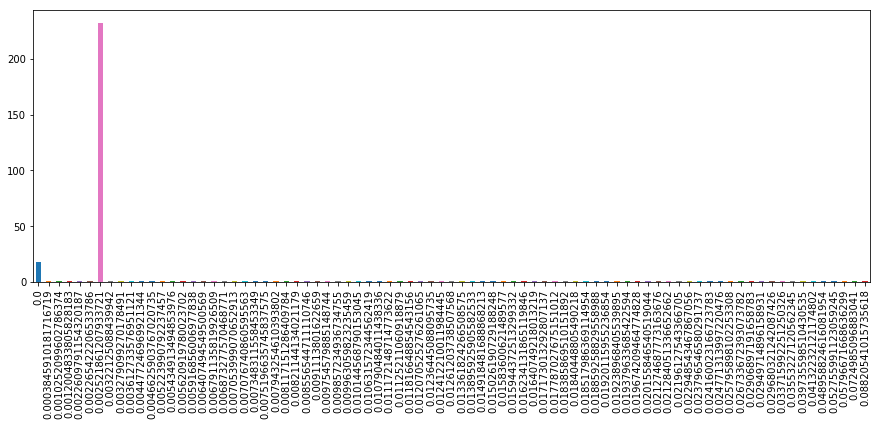

In [26]:
uniq_total = {}

for name, sub_list in uniq_names.items() :
    total = score_df[score_df.sum_regressor.name][score_df.index.values == sub_list].sum()
    uniq_total.setdefault(name,total)
    
total_df = pd.DataFrame(pd.Series(uniq_total), columns=[score_df.sum_regressor.name], index=uniq_total.keys())
#total_df[score_df.sum_regressor > 0.0025]
total_count = pd.value_counts(total_df.sum_regressor)
total_count.sort_index().plot(kind='bar', figsize=(15,5))

In [27]:
max_counter = total_count.index[0]
print(max_counter)
top_73 = total_df[total_df.sum_regressor > max_counter]
print(top_73.shape)
top_73.head()
print(top_73.index)

0.002521861207933721
(74, 1)
Index(['cfam', 'house', 'ainc_1', 'ainc', 'tins', 'EC_wht_23', 'Total_slp_wk',
       'Total_slp_wd', 'HE_ht', 'HE_wt', 'HE_wc', 'HE_BMI', 'HE_glu',
       'HE_HbA1c', 'HE_chol', 'HE_HDL_st2', 'HE_TG', 'HE_HBsAg', 'HE_ast',
       'HE_alt', 'HE_hcv', 'HE_HB', 'HE_HCT', 'HE_BUN', 'HE_crea', 'HE_WBC',
       'HE_RBC', 'HE_Bplt', 'HE_hsCRP', 'HE_Uacid', 'HE_Pb', 'HE_Hg', 'HE_Cd',
       'HE_Uph', 'HE_Usg', 'HE_Ucot', 'HE_UCREA', 'HE_UNa', 'HE_Ukal',
       'HE_fvc', 'HE_fvcp', 'HE_fev1', 'HE_fev1p', 'HE_fev1fvc', 'HE_fev6',
       'HE_fef25_75', 'HE_pef', 'N_WAT_C', 'N_INTK', 'N_EN', 'N_WATER',
       'N_PROT', 'N_FAT', 'N_SFA', 'N_MUFA', 'N_PUFA', 'N_N3', 'N_N6',
       'N_CHOL', 'N_CHO', 'N_TDF', 'N_CA', 'N_PHOS', 'N_FE', 'N_NA', 'N_K',
       'N_VA', 'N_VA_RAE', 'N_CAROT', 'N_RETIN', 'N_B1', 'N_B2', 'N_NIAC',
       'N_VITC'],
      dtype='object')


## Excel 저장

In [28]:
writer = pd.ExcelWriter('feature_importances_score.xlsx')
score_df.to_excel(writer,'feature_importances')
top_73.to_excel(writer,'top_73')
writer.save()

# Feature 선정 후 DT, RF 적용

In [29]:
feature_importances_df = pd.DataFrame(one_hot_df, columns=[
    one_hot_df.HE_MAP.name ,
    one_hot_df.HE_BMI.name ,
    one_hot_df.HE_wc.name ,
    one_hot_df.HE_wt.name ,
    one_hot_df.N_B1.name ,
    one_hot_df.N_B2.name ,
    one_hot_df.N_CA.name ,
    one_hot_df.N_CAROT.name ,
    one_hot_df.N_CHO.name ,
    one_hot_df.N_CHOL.name ,
    one_hot_df.N_EN.name ,
    one_hot_df.N_FAT.name ,
    one_hot_df.N_FE.name ,
    one_hot_df.N_INTK.name ,
    one_hot_df.N_K.name ,
    one_hot_df.N_MUFA.name ,
    one_hot_df.N_N3.name ,
    one_hot_df.N_N6.name ,
    one_hot_df.N_NA.name ,
    one_hot_df.N_NIAC.name ,
    one_hot_df.N_PHOS.name ,
    one_hot_df.N_PROT.name ,
    one_hot_df.N_RETIN.name ,
    one_hot_df.N_SFA.name ,
    one_hot_df.N_TDF.name ,
    one_hot_df.N_VA.name ,
    one_hot_df.N_VA_RAE.name ,
    one_hot_df.N_VITC.name ,
    one_hot_df.N_WATER.name ,
    one_hot_df.Total_slp_wd.name ,
    one_hot_df.Total_slp_wk.name
])
feature_importances_df.head()

,HE_MAP,HE_BMI,HE_wc,HE_wt,N_B1,N_B2,N_CA,N_CAROT,N_CHO,N_CHOL,...,N_PROT,N_RETIN,N_SFA,N_TDF,N_VA,N_VA_RAE,N_VITC,N_WATER,Total_slp_wd,Total_slp_wk
0,98.000000,24.574472,88.1,68.7,1.812120,1.599025,385.891588,817.506495,319.335487,102.970500,...,72.906130,0.000000,24.725186,32.592495,138.638485,68.125541,417.773500,1901.333037,480.0,480.0
13,91.333333,26.624502,95.7,78.4,3.078527,2.638125,695.429418,6959.526200,366.229348,681.090284,...,91.635867,778.191594,14.305767,34.253482,1941.330100,1358.152111,388.132316,1342.086357,330.0,330.0
14,91.666667,26.265432,86.4,85.1,2.216094,1.442875,521.631534,3897.994606,336.361889,266.985886,...,76.823939,110.669065,12.994716,26.328553,782.520607,435.501949,110.379820,1266.923302,480.0,420.0
18,104.666667,28.431733,92.6,81.3,2.160682,1.736965,516.676080,2401.220159,254.489593,519.882188,...,69.417127,192.145060,14.633412,20.030997,597.754458,392.246740,25.878406,755.786546,450.0,390.0
22,100.000000,27.366330,96.8,87.0,2.216094,1.442875,521.631534,3897.994606,336.361889,266.985886,...,76.823939,110.669065,12.994716,26.328553,782.520607,435.501949,110.379820,1266.923302,450.0,390.0


In [30]:
train_fi_df, test_fi_df = train_test_split(feature_importances_df, test_size=0.25)
print(train_fi_df.shape)
print(test_fi_df.shape)

Y = feature_importances_df.HE_MAP.name
X = feature_importances_df.columns.drop(Y).tolist()

(1320, 31)
(440, 31)


In [31]:
dtr_fi_model, dtr_fi_mse = runDTR(X, Y, train_fi_df, test_fi_df)
rfr_fi_model, rfr_fi_mse = runRFR(X, Y, train_fi_df, test_fi_df)

MaxDepth(None) 손실함수(0.0) 소요시간(0.04686403274536133)
MaxDepth(None) 손실함수(16.79873478956229) 소요시간(2.0024209022521973)


In [32]:
score_fi_df = pd.DataFrame()
score_fi_df['pearson_correlation']  = feature_importances_df.corr(method='pearson')['HE_MAP']
score_fi_df['kendall_correlation']  = feature_importances_df.corr(method='kendall')['HE_MAP']
score_fi_df['spearman_correlation'] = feature_importances_df.corr(method='spearman')['HE_MAP']
score_fi_df = score_fi_df[1:]
score_fi_df.head()

,pearson_correlation,kendall_correlation,spearman_correlation
HE_BMI,0.191414,0.138968,0.205904
HE_wc,0.140145,0.104431,0.154653
HE_wt,0.201910,0.139445,0.206862
N_B1,0.044238,0.029227,0.042626
N_B2,0.041135,0.016771,0.024892


In [33]:
score_fi_df['decision_tree_regressor_mse'] = pd.Series(dtr_fi_model.feature_importances_, index=X)
score_fi_df['random_forest_regressor_mse'] = pd.Series(rfr_fi_model.feature_importances_, index=X)

,pearson_correlation,kendall_correlation,spearman_correlation,decision_tree_regressor_mse,random_forest_regressor_mse
HE_BMI,0.191414,0.138968,0.205904,0.126047,0.114153
HE_wc,0.140145,0.104431,0.154653,0.081536,0.068543
HE_wt,0.201910,0.139445,0.206862,0.115567,0.116096
N_B1,0.044238,0.029227,0.042626,0.010967,0.023296
N_B2,0.041135,0.016771,0.024892,0.018122,0.024067
N_CA,0.018709,0.004908,0.007752,0.020673,0.026215
N_CAROT,-0.000493,0.013579,0.020243,0.023021,0.020150
N_CHO,-0.029572,-0.021958,-0.032155,0.031148,0.038734
N_CHOL,0.044684,0.039719,0.058782,0.024475,0.029509
N_EN,0.046666,0.028400,0.041181,0.018307,0.029118


## top 5

In [37]:
score_fi_df.sort_values(by=[score_fi_df.decision_tree_regressor_mse.name], ascending=False).head()

,pearson_correlation,kendall_correlation,spearman_correlation,decision_tree_regressor_mse,random_forest_regressor_mse
HE_BMI,0.191414,0.138968,0.205904,0.126047,0.114153
HE_wt,0.201910,0.139445,0.206862,0.115567,0.116096
HE_wc,0.140145,0.104431,0.154653,0.081536,0.068543
N_VITC,-0.011164,0.007297,0.011038,0.058300,0.034684
Total_slp_wd,-0.037621,-0.019002,-0.027471,0.051205,0.042478


In [38]:
score_fi_df.sort_values(by=[score_fi_df.random_forest_regressor_mse.name], ascending=False).head()

,pearson_correlation,kendall_correlation,spearman_correlation,decision_tree_regressor_mse,random_forest_regressor_mse
HE_wt,0.201910,0.139445,0.206862,0.115567,0.116096
HE_BMI,0.191414,0.138968,0.205904,0.126047,0.114153
HE_wc,0.140145,0.104431,0.154653,0.081536,0.068543
Total_slp_wd,-0.037621,-0.019002,-0.027471,0.051205,0.042478
N_CHO,-0.029572,-0.021958,-0.032155,0.031148,0.038734
